# Amazon reviews dataset

For this dataset i am trying to predict whether an amazon review is positive or negative

In [45]:
import pandas as pd
import matplotlib as plt
import numpy as np
import pickle
import csv 


df = pd.read_csv("amazon.csv",) #import dataset

df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


These give a generall overview of the dataset with the shape of the dataset, number of values and their data type aswell as checking for any null values 

In [46]:
df.info() #gives general information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [47]:
df.isnull().sum() #checking for null data

reviewText    0
Positive      0
dtype: int64

In [48]:
df.shape # this shows the 

(20000, 2)

In [49]:
df.count()

reviewText    20000
Positive      20000
dtype: int64

In [50]:
df.describe

<bound method NDFrame.describe of                                               reviewText  Positive
0      This is a one of the best apps acording to a b...         1
1      This is a pretty good version of the game for ...         1
2      this is a really cool game. there are a bunch ...         1
3      This is a silly game and can be frustrating, b...         1
4      This is a terrific game on any pad. Hrs of fun...         1
...                                                  ...       ...
19995  this app is fricken stupid.it froze on the kin...         0
19996  Please add me!!!!! I need neighbors! Ginger101...         1
19997  love it!  this game. is awesome. wish it had m...         1
19998  I love love love this app on my side of fashio...         1
19999  This game is a rip off. Here is a list of thin...         0

[20000 rows x 2 columns]>

This code turns all of the text into lowercase as .describe has shown that there are a mixture of capitals and lowwercase letters. This is done in order to reduce the amount of anomaly data

In [51]:
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())
df.head()


,reviewText,Positive
0,this is a one of the best apps acording to a b...,1
1,this is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1


Useing MatPlotlib i can visualise the split between the positive and negative review count as this could impact the result due to a low number of train data for negative reviews

<AxesSubplot:>

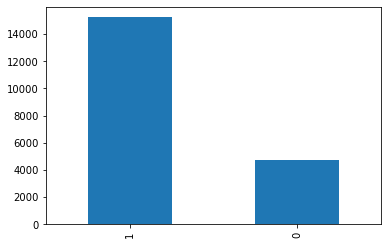

In [52]:
df['Positive'].value_counts().plot(kind='bar')


As we can see the split between positive and negative revieww is very big and this could effect the accuracy of the data set as the small amount of negative reviews will have to be split up even further into test and train leaving even less for the model to learn from

<AxesSubplot:ylabel='Positive'>

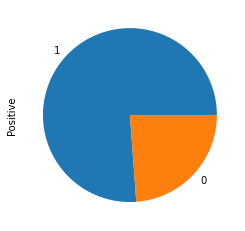

In [53]:
df['Positive'].value_counts().plot(kind='pie')



Another graph showing that the negative rewiews are less than 25% of the entore dataset

Importing SKlearn and splitting the dataset into four parts x_train, y_train, x_test and y_test inorder to test the effectiveness of ML model that was created useing the Train data

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

from sklearn.model_selection import train_test_split

x = df['reviewText']
y = df['Positive']

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.09, random_state=42)

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [55]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

Useing Accuracy score from SKlearn to get an accuracy rating for the SVC Classifier

In [56]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 89.0%


From this i can see that the accuracy of the SVC model is about 90% accurate whitch is a bit low for it to be called accurate

In [57]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test, y_pred)) 

[[ 303  128]
 [  70 1299]]


Printing the confustion matrix for the SVC model to compare the desired value to result

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       431
           1       0.91      0.95      0.93      1369

    accuracy                           0.89      1800
   macro avg       0.86      0.83      0.84      1800
weighted avg       0.89      0.89      0.89      1800



In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train, y_train)
y_pred = pac.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 86.33%
[[ 302  129]
 [ 117 1252]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       431
           1       0.91      0.91      0.91      1369

    accuracy                           0.86      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.86      0.86      0.86      1800



Next i have chosen to run the dataset through another classifier model to see if i can break through to the 90% mark

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train) 


KeyboardInterrupt: 

In [ ]:
y_pred = classifier.predict(x_test)

The RandomForestClassifier did not have a higher overall accuracy than SVM so it will not be used.

In [ ]:
print(f'Accuracy: {round(score * 100, 2)}%')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


Accuracy: 85.72%
[[ 256  175]
 [  46 1323]]
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       431
           1       0.88      0.97      0.92      1369

    accuracy                           0.88      1800
   macro avg       0.87      0.78      0.81      1800
weighted avg       0.87      0.88      0.87      1800

0.8772222222222222


With all of that done i have decided to go with the tfidVectorisor classifier as that has the highest consistant accuracy. And i am now testing the model on some test data that i made to see if it works 

In [ ]:
test_data = "This is useless"


models = [pac, svm]

for model in models:
    corpus = [] # corpus is a colection of records
    corpus.append(test_data)
    corpus = tfidf.transform(corpus)
    pred = model.predict(corpus)
    print(pred)
    if pred == 1:
        print(test_data, "is Positive")
    else:
        print(test_data, "is Negative")

[0]
This is useless is Negative
[0]
This is useless is Negative


Creating pickle files for the model and tfidf to be used in a web app to allow users to check if their review is positive or negative

In [ ]:
import pickle

pickle.dump(svm, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
